### エントロピー

In [3]:
import math
-(0.17*math.log2(0.17)+0.2*math.log2(0.2)+0.33*math.log2(0.33)+0.12*math.log2(0.12)+0.06*math.log2(0.06)+0.08*math.log2(0.08)+0.04*math.log2(0.04))

2.5146585782665962

### ハフマンコード ###

In [4]:
0.17*3+0.20*2+0.33*2+0.12*3+0.06*4+0.08*3+0.04*4

2.5700000000000003

### 英語のエントロピー

In [56]:
# アルファベットの各文字が等確率で出現するなら
# numpy不使用
import math
x=1/26
sum=0
for i in range(1,27):
    sum+=-x*math.log2(x)
print("H(x)math =", sum)

# numpy使用
import numpy as np
x=np.full(26, 1/26)
y=np.sum(-x*np.log2(x))
print("H(x)numpy=", y)

H(x)math = 4.700439718141092
H(x)numpy= 4.700439718141092


### エントロピーの例１

In [10]:
import math
-(1/2*math.log2(1/2)+1/2*math.log2(1/2))

1.0

### エントロピーの例２

In [11]:
import numpy
x=np.full(6,1/6)
y=np.sum(-x*np.log2(x))
print(y)

2.584962500721156


### エントロピーの例２'

In [15]:
import numpy
dice=[1/3, 1/12, 1/12, 1/12, 1/12, 1/3]
x=np.array(dice)
y=np.sum(-x*np.log2(x))
print(y)

2.251629167387823


### エントロピーの例２''

In [25]:
import sys 
import numpy
epsilon=sys.float_info.epsilon # 非常に小さい値
dice=[1-5*epsilon, epsilon, epsilon, epsilon, epsilon, epsilon]
x=np.array(dice)
y=np.sum(-x*np.log2(x))
print(y)

5.93333105324156e-14


### 2元エントロピー関数

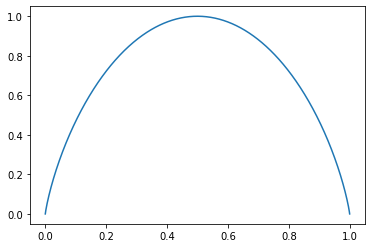

In [41]:
import matplotlib.pyplot as plt
import numpy as np
epsilon=sys.float_info.epsilon # 非常に小さい値

#x=np.linspace(0.01,0.99,98)
x=np.linspace(epsilon,1-epsilon,1000)
y=np.array(-x*np.log2(x)-(1-x)*np.log2(1-x))
plt.plot(x,y)
#plt.show()
plt.savefig("entropy.png")

xはコインの表が出る確率と考える．(1-x)は裏がでる確率． エントロピーが最大になるのはx=(1-x)=0.5の時（公平なコイン）で1bit． いかさまコイン（必ず表がでる）の場合はエントロピーは0bitになる

### 演習問題１

In [29]:
import math
# H(x)
px1=1/8+1/4+1/8
px2=1/8+1/4+1/8
hx=-(px1*math.log2(px1)+px2*math.log2(px2))
print("H(x)=",hx)

# H(y)
py1=1/8+1/8
py2=1/4+1/4
py3=1/8+1/8
hy=-(py1*math.log2(py1)+py2*math.log2(py2)+py3*math.log2(py3))
print("H(y)=",hy)

H(x)= 1.0
H(y)= 1.5


In [33]:
# H(X,Y)
hxy=-(px1*py1*math.log2(px1*py1)+px1*py2*math.log2(px1*py2)+px1*py3*math.log2(px1*py3)+px2*py1*math.log2(px2*py1)+px2*py2*math.log2(px2*py2)+px2*py3*math.log2(px2*py3))
print("H(X,Y)=", hxy)

H(X,Y)= 2.5


In [38]:
#(X|Y)
pcxy11=(1/8)/(1/8+1/8)
pcxy21=(1/8)/(1/8+1/8)
pcxy12=(1/4)/(1/4+1/4)
pcxy22=(1/4)/(1/4+1/4)
pcxy13=(1/8)/(1/8+1/8)
pcxy23=(1/8)/(1/8+1/8)
hcxy=py1*(-pcxy11*math.log2(pcxy11)-pcxy21*math.log2(pcxy21)) + py2*(-pcxy12*math.log2(pcxy12)-pcxy22*math.log2(pcxy22)) + py3*(-pcxy13*math.log2(pcxy13)-pcxy23*math.log2(pcxy23))
print("H(X|Y)=", hcxy) 

#(Y|H)
pcyx11=(1/8)/(1/8+1/4+1/8)
pcyx21=(1/4)/(1/8+1/4+1/8)
pcyx31=(1/8)/(1/8+1/4+1/8)
pcyx12=(1/8)/(1/8+1/4+1/8)
pcyx22=(1/4)/(1/8+1/4+1/8)
pcyx32=(1/8)/(1/8+1/4+1/8)
hcyx=px1*(-pcyx11*math.log2(pcyx11)-pcyx21*math.log2(pcyx21)-pcyx31*math.log2(pcyx31)) + px2*(-pcyx12*math.log2(pcyx12)-pcyx22*math.log2(pcyx22)-pcyx32*math.log2(pcyx32))
print("H(Y|X)=", hcyx)

H(X|Y)= 1.0
H(Y|X)= 1.5


In [39]:
# I(X;Y)
pxy11=1/8
pxy12=1/4
pxy13=1/8
pxy21=1/8
pxy22=1/4
pxy23=1/8
ixy=pxy11*math.log2(pxy11/(px1*py1)) + pxy21*math.log2(pxy21/(px2*py1))\
+pxy12*math.log2(pxy12/(px1*py2)) + pxy22*math.log2(pxy22/(px2*py2))\
+pxy13*math.log2(pxy13/(px1*py3)) + pxy23*math.log2(pxy23/(px2*py3))
print("I(X;Y)=", ixy)

I(X;Y)= 0.0


### 演習問題４

In [49]:
import numpy as np

P=np.array([1/4, 1/4, 1/4, 1/4])
Q=np.array([1/10, 1/5, 1/5, 1/2])

PlgPpQ=P*np.log2(P/Q)
D_PQ=np.sum(PlgPpQ)
print("D(P||Q)=", D_PQ)

D(P||Q)= 0.2414460711655218


In [50]:
P=np.array([1/10, 1/5, 1/5, 1/2])
Q=np.array([1/4, 1/4, 1/4, 1/4])

PlgPpQ=P*np.log2(P/Q)
D_PQ=np.sum(PlgPpQ)
print("D(P||Q)=", D_PQ)

D(P||Q)= 0.23903595255631888


In [51]:
P=np.array([1/3, 1/6, 3/8, 1/8])
Q=np.array([1/3, 1/4, 1/6, 1/4])

PlgPpQ=P*np.log2(P/Q)
D_PQ=np.sum(PlgPpQ)
print("D(P||Q)=", D_PQ)

D(P||Q)= 0.2162281254206745


### 演習問題５

In [52]:
P=np.array([1/8, 1/8, 1/4, 1/2])
Q=np.array([1/4, 1/4, 1/4, 1/4])

PlgPpQ=P*np.log2(P/Q)
D_PQ=np.sum(PlgPpQ)
print("D(P||Q)=", D_PQ)

QlgQpP=Q*np.log2(Q/P)
D_QP=np.sum(QlgQpP)
print("D(Q||P)=", D_QP)

D(P||Q)= 0.25
D(Q||P)= 0.25


In [58]:
P=np.array([1/8, 1/8, 1/4, 1/2])
Q=np.array([1/2, 1/4, 1/8, 1/8])

PlgPpQ=P*np.log2(P/Q)
D_PQ=np.sum(PlgPpQ)
print("D(P||Q)=", D_PQ)

QlgQpP=Q*np.log2(Q/P)
D_QP=np.sum(QlgQpP)
print("D(Q||P)=", D_QP)

D(P||Q)= 0.875
D(Q||P)= 0.875


In [59]:
P=np.array([1/8, 1/2, 1/8, 1/4])
Q=np.array([1/2, 1/4, 1/8, 1/8])

PlgPpQ=P*np.log2(P/Q)
D_PQ=np.sum(PlgPpQ)
print("D(P||Q)=", D_PQ)

QlgQpP=Q*np.log2(Q/P)
D_QP=np.sum(QlgQpP)
print("D(Q||P)=", D_QP)

D(P||Q)= 0.5
D(Q||P)= 0.625
